<a href="https://colab.research.google.com/github/Guest1537/AD-BP_mvp/blob/main/MVP_ML%26A_Pedro_Caleffi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning & Analytics - PUC-Rio

## Minimum Viable Product - MVP

#### Pedro Caleffi Barbosa 2024

Visando a facilitação no momento da avaliação, se listará abaixo os pontos evidenvciados como essenciais para a avaliação do produto por parte da equipe da PUC-Rio:

1. Definição do problema

1.1 Descrição do problema.

1.2 Premissas e hipóteses sobre o problema.

1.3 Restrições e condições impostas para seleção de dados.

1.4 Descrição do dataset.

2. Preparação de Dados

2.1 Separção do dataset entre treino e teste (e validação) com e sem método de validação cruzada.

2.2 Verificação de quais operações de transformação de dados (normalização e padronização, transformação de imagens em tensores) são mais apropriadas para o problema e salve visões diferentes do seu dataset para posterior avaliação dos modelos.

2.3 Refino da quantidade de atributos disponíveis e aplicação do processo de feature selection.

3. Modelagem e treinamento:

3.1 Seleção dos algoritmos mais indicados para o problema e dataset escolhidos.

3.2 Possibilidade de ajustes iniciais dos hiperparâmetros

3.3 Validação do treinamento do modelo e verificação de underfitting.

3.4 A possibilidade de otimização dos hiperparâmetros de algum dos modelos e justificativas.

3.5 Identificação de método avançado ou mais complexo que possa ser avaliado.

3.6 Criação de comitê de modelos diferentes para o problema (ensembles).

4. Avaliação de resultados

4.1 Selecione as métricas de avaliação condizentes com o problema, justificando.

4.2 Treinamento do modelo escolhido com toda a base de treino, e teste com a base de teste.

4.3 Os resultados se encaixam dentro do esperado?

4.4 Observação de problema de overfitting.

4.5 Comparação dos resultados de diferentes modelos.

4.6 Descrição da melhor solução encontrada.

\

Ao longo deste notebook será evidenciado pelo respectivo número cada momento em que cada ponto do checklist será cumprido.

# 1. Definição do problema
### 1.1 Descrição do problema
No sistema bancário existe o setor de crédito estressado, responsável pela recuperação de capital em operações inadimplentes. Tal setor tem apresentado grande desenvolvimento nos últimos anos por diversos fatores, dentre eles, os impactos da pandemia de COVID-19 e a consequente falência de diversas empresas.
Neste setor é frequentemente adotada a execução extrajudicial de garantias em operações financeiras (bens móveis ou imóveis, como carros ou terrenos, respectivamente) e tais execuções incorrem na criação de autos processuais, compostos e desenvolvidos pelas Partes do processo (Exequente/Executado, Credor/Devedor).
Em casos onde o credor não consegue finalizar a operação de recuperação de crédito dentro da competencia da recuperação judicial, existe a possibilidade de cessão do crédito judicial para terceiros.
Terceiros interessados na aquisição de um crédito judicial analisam os movimentos processuais para verificar seu interesse em adquirir o crédito. Ditos processos podem chegar a ter centenas de milhares de páginas, especialmente em processos de recuperação judicial, o que demanda centenas de horas-trabalho, sendo este o problema que se visa solucionar com a automação da detecção de dados das garantias de processos judiciais.
Tendo em vista a limitação temporal, este trabalho se concentra apenas em matrículas de imóveis e a identificação de informações vinculadas à esse tipo de certidão.


Neste MVP se treina modelos de machine learning visando classificação.


### 1.2 Premissas e hipóteses
Processos judiciais podem apresentar operações financeiras vinculadas à imóveis ou não.
Todo processo judicial possui duas partes interessadas, um tribunal ao qual está relacionado.
Informações disponíveis sobre o imóvel apresentado na certidão da matrícula podem variar, assim como a formatação do documento.
Existem milhares de Cartórios de Registros de Imóveis no Brasil, os responsáveis pela emissão, registro e gestão de documentos de matrículas de imóveis.
Toda matrícula de imóvel representa um único imóvel, com vaga de garagem vinculada ou não. Existe a possibilidade de diversas matrículas formarem um único imóvel.
Cada matrícula possuí um único número a representando e vinculado a um único Cartório de Registro de Imóveis, que será classificado em uma string contendo número e CRI de registro.
Existem casos onde as matrículas de um único imóvel são registradas em diferentes CRIs, estes casos são excessão e são corrigidos assim que percebidos, por não se tratar da maneira correta do registro do imóvel.
Documentos se matrícula de imóvel podem apresentar operações financeiras vinculadas ou não. Dentre as operações possíveis se ressalta: Cédula de Crédito Bancário (CCB), Cédula de Crédito Comercial (CCC), Cédula de Crédito à Exportação (CCE), Cédula de Crédito Industrial (CCI), Cédula Rural Hipotecária (CRH), Cédula Rural Pignoraticia e Hipotecária (CRPH), Contrato de Câmbio (CC), Escritura Pública de Confissão e Assunção de Dívida (EPCAD, doravante denominado apenas "Escritura Pública" ou "EP").

### 1.3 Restrições e condições na seleção dos dados
Devido à profundidade do problema, se opta por sua solução parcial. Se apresenta um algorítimo de machine learning que identifica páginas de matrículas de imóveis encontradas durante a leitura de PDF. Para tal, se tranforma cada página de aquivo PDF em arquivo png para aplicação de easyOCR, seguido da vetorização dos textos com word2vec e treino, teste e validação do modelo.
Devido à realidade sigilosa de processos judiciais atuais, se opta pela simples utilização de arquivos de matrículas de imóveis, documentos não sigilosos, e outros documentos antigos para treino, teste e validação do modelo treinado.

### 1.4 Descrição do dataset
O dataset utilizado foi criado especificamente com intuíto de treinar este modelo. Foram selecionadas centenas de arquivos PDF contendo matrículas de imóveis e outros documentos aleatórios para validação do modelo. As matrículas de imóveis utilizadas foram retiradas de base de dados verificada internamente na empresa em que trabalho atualmente. Outros documentos utilizados para treino e teste foram encontrados em sites de tribunais do Brasil de maneira pública, tanto como através das plataformas estaduais de processos judiciais eletrônicos, através de consultas processuais públicas.
As imagens criadas com documentos de matrículas de imóveis serão classificadas como "matricula" e todos outras imagens serão classificadas como "outro".
Todos os documentos PDF são tranformados em .png para leitura do modelo.


Neste MVP se busca apresentar soluções iniciais para a demanda de processos internos em empresa do setor de créditos estressados, como evidenciados abaixo:

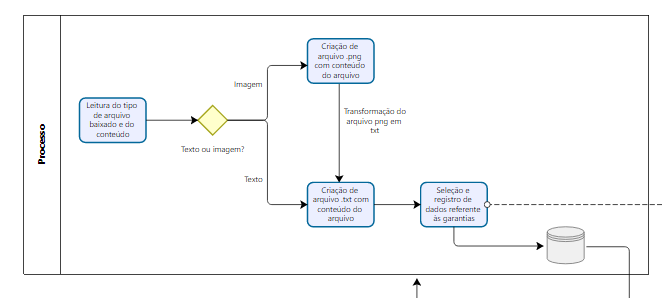



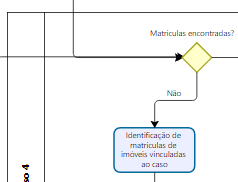

Tendo em vista a demanda desde produto, se disponibiliza uma conta do google com os arquivos trabalhados para acesso e avaliação do trabalho:

Email:
XXXXXXXXXXXX

Senha:
XXXXXXXXXXXX


Comenta-se aqui, como o trabalho foi produzido em meu google drive pessoal e, devido à questão de tempo, não foi possível migrar os arquivos para repositório do github.

Caso não seja possível realização de uso da conta fornecida, apresento links para download das pastas com textos pré-processados utilizados nos treinamentos dos modelos a seguir. Favor inclí-los em uma pasta não zipada em seu ambiente google drive utilizado para acessar este notebook:

download do dataset original (arquivos PDF) = content/drive/MyDrive/MVP3_PUCRJ = https://drive.google.com/drive/folders/1NsZzZ2sKsB3dq446gzIYaqkKRsA7UGV7?usp=sharing

download do dataset de validação (arquivos png) = content/drive/MyDrive/MVP3_PUCRJpngvalidacao = https://drive.google.com/drive/folders/1vh-LbO_Ru5Mqx87SHvDXGgmFsTUfoWwh?usp=drive_link

download dataset original transformado em texto pré-processado  = content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc =
https://drive.google.com/drive/folders/1hDs2ezj3b4bZbbUlfE2NQmioz6eefb8g?usp=sharing

download dataset de validação transformado em texto pré-processado = content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc = https://drive.google.com/drive/folders/1OzhYdZO03eVjrP6lLNyrYV83sQ-1p1Js?usp=sharing


### Instalação de bibliotecas e download de pipeline

In [ ]:
## Instala as bibliotecas, caso necessário:
!pip install --upgrade nltk spacy summa numpy
!pip install --upgrade scikit-learn
!pip install gensim easyocr PyMuPDF pillow

# Download do pipeline para processamento de texto em português da Spacy.
!python3 -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 27.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### Importação de bibliotecas

Após rodar o bloco de código acima, **reinicie o ambiente de execução.**

**Atenção!**

**Após instalação e downloads acima, reiniciar ambiente de execução antes de rodar o bloco de código abaixo**

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação das bibliotecas instaladas
import os  # Para file handling
import re  # Para preprocessing
import cv2 # Para pré-processamento das imagens
import datetime # Definição da data para salvar modelos de dias diferentes em arquivos diferentes
import fitz  # Para trabalhar com PDFs
import gdown # Para download das imagens no google drive
import matplotlib.pyplot as plt
import nltk  # Para natural language handling
import numpy as np
import pandas as pd  # Para data handling
import pickle
import random # Para randomizar a seleção de arquivos que serão lidos
import spacy  # Para preprocessing
import sklearn
import sklearn.metrics as skm
import logging  # Setting up the loggings to monitor gensim
import easyocr # Para identificação e leitura de texto
import seaborn as sns # Para construção de heatmap
import joblib # Para melhorar eficiência na importação de dados

from collections import defaultdict  # For word frequency

from gensim.models import Word2Vec # Para transformação de texto em vetores
from googleapiclient.discovery import build # Para interação com API do google

from google.colab import auth # Para aturização do acesso às pastas no google drive
from google.colab import drive # Para acesso aos arquivos PDF que formam o dataset

from joblib import dump # Para salvar modelos

from nltk.corpus import stopwords  # Para identificação de stopwords
from nltk.tokenize import word_tokenize  # Para tokenização de palavras
from nltk.tokenize import sent_tokenize  # Para tokenização de frases
from nltk.stem import WordNetLemmatizer  # Para lemmatization

from PIL import Image # Para leitura de imagem

from sklearn.decomposition import TruncatedSVD # Padronizador de dimensionalidade

# Algorítimos para machine learning - Classificação
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Para transformar vetorizar textos
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Para mensuração das estatísticas do modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay  # Para validação do modelo

from sklearn.model_selection import train_test_split # Para divisão dos dados e treinamento
from sklearn.model_selection import KFold # Para validação cruzada
from sklearn.model_selection import StratifiedKFold # Para estratificação do KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier # Para categorização de dados com base em pontos de dados mais próximos

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, MaxAbsScaler # Para pré-processamento de imagens

from sklearn.pipeline import Pipeline # Para uso de pipelines em ensambles

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier # Base estimator for bagging

from time import time  # To time our operations

# Baixar o recurso punkt, caso não disponível na máquina
nltk.download('punkt')

# Configura o logging para leitura do texto
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

# Define o dia de hoje
data_hoje = datetime.date.today().strftime("%Y-%m-%d")

# Inicialização do leitor de OCR em português
reader = easyocr.Reader(['pt'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Montagem de ambiente google drive no Colab
drive.mount("/content/drive", force_remount=True) # Caso já hava ambiente google drive aberto, força-se sua remontagem

Mounted at /content/drive


## Construção e carga do Dataset

Em razão da demanda específica para o produto em contrução aqui apresentado, se utiliza do ambiente google drive, devido à realidade do ambiente digital da empresa em questão.

In [ ]:
# Especificar o ID da pasta
folder_id = 'MVP3_PUCRJ'

# Definir o caminho do diretório
directory_path = f'/content/drive/MyDrive/{folder_id}'

# Listar arquivos no diretório
files = os.listdir(directory_path)
print("Arquivos no diretório:")
for file in files:
    print(file)

Recomenda-se pular para a etapa de Definição da pasta contendo o dataset, tendo em vista o escopo do MVP

### Desenvolvimento do dataset - pule este bloco

Lê os arquivos de pasta diretório contendo arquivos contendo matrículas de imóveis e outros situada em ambiente google drive, realiza sua tranformação de PDF para png, identifica seu texto com o uso da biblioteca OCR e cria arquivos txt para cada arquivo png. É realizada etapa de pré-processamento de imagem para melhor leitura do texto.

Tranformação de arquivo PDF para PNG sendo cada página retirada do PDF transformada em um arquivo png, caso não exista

In [ ]:
# Função para converter PDF em PNG de arquivos de matrículas de imóveis
def pdf_to_png(pdf_path, output_folder):
    # Abra o arquivo PDF
    pdf_document = fitz.open(pdf_path)
    # Itere sobre todas as páginas do PDF
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        # Renderiza a página como uma imagem
        image = page.get_pixmap()
        # Cria uma imagem PIL a partir dos dados de imagem renderizados
        image_pil = Image.frombytes("RGB", (image.width, image.height), image.samples)
        # Salva a imagem como PNG
        image_filename = f'{os.path.basename(pdf_path)}_page_{page_num + 1}.png'
        image_path = os.path.join(output_folder, image_filename)
        # Verifica se o arquivo já existe
        if not os.path.exists(image_path):
            image_pil.save(image_path, "PNG")
            print(f'Página {page_num + 1} do {os.path.basename(pdf_path)} salva como {image_path}')
        else:
            print(f'O arquivo {image_filename} já existe.')
# Pasta no Google Drive onde estão os arquivos PDF
pdf_folder = '/content/drive/MyDrive/MVP3_PUCRJ'

# Pasta de saída no Google Drive
output_folder = '/content/drive/MyDrive/MVP3_PUCRJ_pngfile'

# Percorre todos os arquivos PDF na pasta
for pdf_file in os.listdir(pdf_folder):
    if pdf_file.endswith('.pdf'):
        pdf_path = os.path.join(pdf_folder, pdf_file)
        pdf_to_png(pdf_path, output_folder)


#### Pré-processamento de Imagens

Acesso às pastas criadas no ambiente google drive para pré-processamento de arquivos png (Escala cinza, redimensionamento, morfologia), salvando arquivos pré-processados

In [ ]:
# Caminhos das pastas de origem e destino
pasta_origem = "/content/drive/MyDrive/MVP3_PUCRJ_pngfile"
pasta_destino = "/content/drive/MyDrive/MVP3_PUCRJ_pngfile_preproc"

# Certifique-se de que a pasta de destino existe ou crie-a se não existir
os.makedirs(pasta_destino, exist_ok=True)

# Função para pré-processar uma imagem
def preprocess_image(image_path, output_path, target_size=(2100, 2970)):
    """Função para pré-processar uma imagem.

    Parâmetros:
    - image_path: Caminho para a imagem original.
    - output_path: Caminho para salvar a imagem pré-processada.
    - target_size: Tamanho para redimensionar a imagem. (2100, 2970).

    Retorna:
    - image: Imagem pré-processada.
    """
    try:
        # Verificar se o arquivo de destino já existe
        if not os.path.exists(output_path):
            # Carregar a imagem em escala de cinza
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Verificar se a imagem foi carregada corretamente
            if image is None:
                raise FileNotFoundError(f"A imagem não pôde ser carregada a partir de {image_path}")

            # Redimensionar a imagem para o tamanho padrão
            image = cv2.resize(image, target_size)

            # Aplicar operações morfológicas para melhorar palavras
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
            image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

            # Salvar a imagem pré-processada
            cv2.imwrite(output_path, image)

            print(f"A imagem pré-processada foi salva em {output_path}")

            # Retornar a imagem pré-processada
            return image
        else:
            print(f"O arquivo {output_path} já existe. Pulando o pré-processamento.")
            return None

    except Exception as e:
        print(f"Erro durante o pré-processamento da imagem: {e}")
        return None

# Percorre todas as imagens na pasta de origem
for arquivo in os.listdir(pasta_origem):
    # Verifica se o arquivo é uma imagem (adicionando mais extensões conforme necessário)
    if arquivo.endswith(".png") or arquivo.endswith(".jpg") or arquivo.endswith(".jpeg"):
        # Caminho completo para a imagem de origem
        caminho_imagem = os.path.join(pasta_origem, arquivo)

        # Caminho completo para salvar a imagem pré-processada
        caminho_destino = os.path.join(pasta_destino, arquivo)

        # Pré-processar a imagem e salvar na pasta de destino
        preprocess_image(caminho_imagem, caminho_destino)

#### Extração do texto das imagens



ABAIXO LEITURA(OCR) DE ARQUIVO PNG PRÉ-PROCESSADO, EXTRAÇÃO DO TEXTO E SALVAMENTO COMO ARQUIVO TXT

ESTE BLOCO DE CÓDIGO PODE DEMORAR DIAS PARA FINALIZAR!

Motivado pela data limite da entrega do produto, terei que manter esse processo inacabado.

In [ ]:
# Caminho das pastas de origem e destino
pasta_origem = "/content/drive/MyDrive/MVP3_PUCRJ_pngfile_preproc"
pasta_destino = "/content/drive/MyDrive/MVP3_PUCRJ_text_extracted"

# Inicializa o leitor de OCR em português
reader = easyocr.Reader(['pt'])

# Itera sobre todos os arquivos na pasta de origem
for arquivo in os.listdir(pasta_origem):
    # Caminho completo para a imagem de origem
    caminho_imagem = os.path.join(pasta_origem, arquivo)

    # Verifica se o arquivo é uma imagem (adicionando mais extensões conforme necessário)
    if arquivo.endswith(".png") or arquivo.endswith(".jpg") or arquivo.endswith(".jpeg"):
        # Cria o caminho do arquivo de texto correspondente na pasta de destino
        base_filename = os.path.splitext(arquivo)[0]  # Retire a extensão do nome do arquivo de imagem
        output_path = os.path.join(pasta_destino, f"{base_filename}.txt")

        # Verifica se o arquivo de texto já existe na pasta de destino
        if os.path.exists(output_path):
            print(f"O arquivo de texto {output_path} já existe.")
            continue

        # Carregue a imagem
        image = cv2.imread(caminho_imagem)

        # Converta a imagem para escala de cinza
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Aplique a binarização usando limiar adaptativo
        image_binarized = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

        # Repita o processo de binarização para refinar a imagem e melhorar a leitura do texto
        image = image_binarized
        image_binarized = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

        # Uso do OCR para ler o texto na imagem processada
        result = reader.readtext(image_binarized)

        # Salva o texto extraído em um arquivo de texto
        with open(output_path, "w", encoding="utf-8") as f:
            for item in result:
                # O item[1] contém o texto extraído
                f.write(item[1] + "\n")

        print(f"Texto extraído de {caminho_imagem} e salvo em {output_path}")

### Pré-processamento do texto(dados) e definição da pasta contendo o dataset - continue aqui
A pasta é formada pelos arquivos texto pré-processados. Eles foram obtidos a partir do pré-processamento das imagens originais (matrículas de imóveis e outros documentos de exemplo), seguido do uso da biblioteca OCR para identificação do texto nas imagens e sua transcrição para um arquivo texto.

Ressalta-se aqui, que a tese por trás do uso dessa fonte de dados é baseado em seu futuro uso e refino com uma base mais bem estruturada de dados, com aspecto sigiloso, em outras palavras, não pode ser disponibilizado em link público.

In [ ]:
# Defina o caminho das pastas de origem e destino
pasta_origem = "/content/drive/MyDrive/MVP3_PUCRJ_text_extracted"
pasta_destino = "/content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc"

# Certifique-se de que a pasta de destino existe, caso contrário, crie-a
os.makedirs(pasta_destino, exist_ok=True)


In [ ]:
# Função para pré-processar texto
def preprocess_text(text):
    # Converter o texto para minúsculas
    text = text.lower()

    # Remover pontuações e caracteres especiais
    text = re.sub(r'[^\w\s]', '', text)

    # Remover múltiplos espaços em branco
    text = re.sub(r'\s+', ' ', text)

    return text

In [ ]:
# Itera sobre todos os arquivos na pasta de origem
for arquivo in os.listdir(pasta_origem):
    # Verifica se o arquivo é um arquivo de texto
    if arquivo.endswith(".txt"):
        # Caminho completo para o arquivo de texto de origem
        caminho_arquivo_origem = os.path.join(pasta_origem, arquivo)

        # Caminho completo para o arquivo de texto pré-processado na pasta de destino
        caminho_arquivo_destino = os.path.join(pasta_destino, arquivo)

        # Verifica se o arquivo de destino já existe
        if os.path.exists(caminho_arquivo_destino):
            print(f"Arquivo {arquivo} já existe em {caminho_arquivo_destino}. Pulando para o próximo arquivo...")
            continue

        # Lê o conteúdo do arquivo de texto
        with open(caminho_arquivo_origem, 'r', encoding='utf-8') as file:
            conteudo = file.read()

        # Pré-processa o texto
        texto_preprocessado = preprocess_text(conteudo)

        # Salva o texto pré-processado no arquivo de texto na pasta de destino
        with open(caminho_arquivo_destino, 'w', encoding='utf-8') as file:
            file.write(texto_preprocessado)

        print(f"Arquivo {arquivo} pré-processado e salvo em {caminho_arquivo_destino}.")

### Definição da pasta contendo o dataset

Acessa pasta contendo dataset de arquivos texto pré-processados e registra as strings de textos dos arquivos

In [ ]:
# Apenas definição do dataset, visando agilidade da execução do código
pasta_destino = "/content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc"

Define função de pré-processamento do texto

In [ ]:
# Registro do texto pré-processado para uso no código
# Itere sobre todos os arquivos na pasta de destino
for arquivo in os.listdir(pasta_destino):
    # Verifique se o arquivo é um arquivo de texto
    if arquivo.endswith(".txt"):
        # Caminho completo para o arquivo de texto de origem
        caminho_arquivo_destino = os.path.join(pasta_destino, arquivo)

        # Leia o conteúdo do arquivo de texto
        with open(caminho_arquivo_destino, 'r', encoding='utf-8') as file:
            conteudo = file.read()

        # Pré-processa o texto
        texto_preprocessado = preprocess_text(conteudo)

# Aplicação de modelos

Modelos word2vec, LogisticRegression, KNeighborsClassifier,  DecisionTreeClassifier e GaussianNB

### Treinamento do modelo - word2vec básico

Cria e salva vetorizador para uso em arquivos futuros, cria rótulos baseado em palavras-chave encontradas na string do título do arquivo, busca palavras-chave na string de texto do arquivo para classificá-lo entre matrícula ou outro, avalia o modelo e salva para futuro uso.

In [ ]:
# Adiciona os textos dos arquivos já pré-processados ao vocabulário
arquivos_preprocessados = os.listdir(pasta_destino)
textos_preprocessados = []

for arquivo in arquivos_preprocessados:
    caminho_arquivo_destino = os.path.join(pasta_destino, arquivo)
    with open(caminho_arquivo_destino, 'r', encoding='utf-8') as file:
        conteudo = file.read()
        texto_preprocessado = preprocess_text(conteudo)
        textos_preprocessados.append(texto_preprocessado)


In [ ]:
# Inicializa e ajusta o vetorizador CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(textos_preprocessados)

In [ ]:
# Salva o vetorizador CountVectorizer
path_vectorizer = "/content/drive/MyDrive/trained_vectors"
os.makedirs(path_vectorizer, exist_ok=True)
name_vectorizer = "vectorizer.pkl"
joblib.dump(vectorizer, os.path.join(path_vectorizer, name_vectorizer))
print(f"Vetorizador salvo em {os.path.join(path_vectorizer, name_vectorizer)}.")

Vetorizador salvo em /content/drive/MyDrive/trained_vectors/vectorizer.pkl.


In [ ]:
# Inicializa e treina o modelo Word2Vec
# Suponha que 'textos_preprocessados' seja a lista de textos tokenizados
word2vec_model = Word2Vec(textos_preprocessados, min_count=1, vector_size=100)


In [ ]:
# Salvar o modelo Word2Vec
path_word2vec_model = "/content/drive/MyDrive/trained_models"
os.makedirs(path_word2vec_model, exist_ok=True)
name_word2vec_model = "word2vec_model.bin"
word2vec_model.save(os.path.join(path_word2vec_model, name_word2vec_model))
print(f"Modelo Word2Vec salvo em {os.path.join(path_word2vec_model, name_word2vec_model)}.")

Modelo Word2Vec salvo em /content/drive/MyDrive/trained_models/word2vec_model.bin.


In [ ]:
# Carregar o vetorizador
path_vectorizer = "/content/drive/MyDrive/trained_vectors/vectorizer.pkl"
with open(path_vectorizer, 'rb') as f:
    vectorizer = pickle.load(f)

# Carregar o modelo Word2Vec
path_word2vec_model = "/content/drive/MyDrive/trained_models/word2vec_model.bin"
word2vec_model = Word2Vec.load(path_word2vec_model)

# Diretório dos textos pré-processados
directory_texts = "/content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc"


In [ ]:
# Função para ler os textos de um diretório
def read_texts_directory(directory):
    texts = []
    titles = []
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()
            texts.append(text)
            titles.append(file)
    return texts, titles

In [ ]:
# Função para criar rótulos com base nos títulos dos arquivos
def create_labels(titles):
    labels = []
    keywords = ['matr', 'cart[óo]rio', 'of[ií]cio', 'tabelionato', 'registro', 'comarca', 'im[oó]vel', 'im[oó]veis', 'imov', 'área', 'áreà', 'grau']
    for title in titles:
        if any(re.search(fr'\b{word}\b', title, flags=re.IGNORECASE | re.UNICODE) for word in keywords):
            labels.append('matrícula')
        else:
            labels.append('outro')
    return labels

In [ ]:
# Ler textos do diretório e criar rótulos
texts, titles = read_texts_directory(directory_texts)
labels = create_labels(titles)

In [ ]:
# (Checklist ponto 2.1) Dividir dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [ ]:
# Definir a função verificar_matricula
def check_registration(tokens, model):
    # Palavras-chave para classificar como matrícula (tentativa)
    keywords = ['matr', 'cart[óo]rio', 'of[ií]cio', 'tabelionato', 'registro', 'comarca', 'im[oó]vel', 'im[oó]veis', 'imov', 'área', 'áreà', 'grau']
    # Verificar a presença de "matr", "matr.", "matrícula" ou "matrícula."
    if any(re.search(fr'\b{word}\b', token, flags=re.IGNORECASE | re.UNICODE) for token in tokens for word in keywords):
        return "matrícula"
    else:
        return "outro"

In [ ]:
# Definir a função avaliar_modelo
def evaluate_model(model, test_texts, test_classifications):
    predictions = []
    out_of_vocab_words = set()
    for tokens, _ in zip(test_texts, test_classifications):
        tokens_in_vocab = [word for word in tokens if word in model.wv]
        if tokens_in_vocab:
            # Aqui você pode usar o vetor de texto para fazer previsões com seu modelo de classificação
            prediction = check_registration(tokens, model)
            predictions.append(prediction)
        else:
            out_of_vocab_words.update(set(tokens))
            predictions.append('outro')

    accuracy = accuracy_score(test_classifications, predictions)
    print(f"A precisão do modelo é: {accuracy}")
    if out_of_vocab_words:
        print(f"Palavras fora do vocabulário: {out_of_vocab_words}")

In [ ]:
# Avaliar o modelo Word2Vec
evaluate_model(word2vec_model, X_test, Y_test)

A precisão do modelo é: 0.3045267489711934


In [ ]:
# Salvar o modelo Word2Vec novamente
path_saved_model = '/content/drive/MyDrive/Word2Vec_model'
word2vec_model.save(path_saved_model)

print(f"Modelo Word2Vec salvo em {path_saved_model}.")

Modelo Word2Vec salvo em /content/drive/MyDrive/Word2Vec_model.


### Teste do modelo word2vec

Carrega o modelo word2vec, tokeniza documentos txt encontrados no dataset, classifica o arquivo entre matrícula ou outro, carrega teste e avalia taxa de acerto do modelo

In [ ]:
# Diretório com os arquivos de teste
directory_test = '/content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc_test'

# Carregar o modelo Word2Vec
word2vec_model_loaded = Word2Vec.load('/content/drive/MyDrive/Word2Vec_model')

In [ ]:
# Função para tokenizar um documento
def tokenize_document(document):
    return document.lower().split()

# Função para classificar se um texto é uma matrícula ou não
def classify_registration(text, model):
    # Tokenizar o texto do arquivo
    tokens = tokenize_document(text)

    # Verificar a presença de "matr" ou "matr." nos tokens
    if any(re.search(r'\bmatr\.?\b', token) for token in tokens):
        return "matrícula"
    else:
        return "outro"

# Função para calcular a taxa de acerto do modelo
def calculate_accuracy_rate(model, test_texts, test_classifications):
    total = 0
    correct = 0
    for text, real_classification in zip(test_texts, test_classifications):
        predicted_classification = classify_registration(text, model)
        total += 1
        if predicted_classification == real_classification:
            correct += 1
    accuracy_rate = (correct / total) * 100 if total > 0 else 0
    return accuracy_rate

In [ ]:
# Carregar textos de teste e suas classificações reais
test_texts = []
test_classifications = []
for file_name in os.listdir(directory_test):
    if file_name.endswith('.txt'):
        file_path = os.path.join(directory_test, file_name)
        with open(file_path, 'r', encoding='utf-8') as text_file:
            text = text_file.read()
            test_texts.append(text)
            real_classification = "matrícula" if "matr" in file_name.lower() else "outro"
            test_classifications.append(real_classification)


In [ ]:
# Calcula a taxa de acerto do modelo no conjunto de teste
accuracy_rate_test = calculate_accuracy_rate(word2vec_model_loaded, test_texts, test_classifications)
print(f"Taxa de acerto do modelo no conjunto de teste: {accuracy_rate_test:.2f}%")

Taxa de acerto do modelo no conjunto de teste: 41.67%


Observa-se um resultado muito aquém do ótimo, ainda mais tendo em vista como o modelo está classificando os arquivos apenas entre duas classes.

Tendo em vista o resultado acima inferior a 50%, verifica-se claramente a ineficácia do modelo word2vec para o problema exposto, ressaltado pelos vetores retornados no código de treinamento do modelo.

É clara a necessidade de melhor pré-processamento das imagens para uso da bilioteca cv2.

Abaixo se faz o teste de outros tipos de modelagem para verificar o melhor resultado.

### Conversão de vetores para matriz de valores para uso em outros modelos

Carrega vetorizador, e diretório de textos pré-processados, lê os textos, cria rótulos para os arquivos, divide em treino e teste, vetoriza textos de treino e teste e converte em matrizes densas.

Em seguida, nomaliza os dados de entrada, armazena modelos a serem testados em uma lista e abre as variáveis para armazenar os resultados.

In [ ]:
# Carregar o vetorizador
caminho_vetorizador = '/content/drive/MyDrive/trained_vectors/vectorizer.pkl'
with open(caminho_vetorizador, 'rb') as f:
    vetorizador = pickle.load(f)

In [ ]:
# Diretório dos textos pré-processados
diretorio_textos = '/content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc'

In [ ]:
# Função para ler os textos de um diretório
def ler_textos_diretorio(diretorio):
    textos = []
    titulos = []
    for arquivo in os.listdir(diretorio):
        caminho_arquivo = os.path.join(diretorio, arquivo)
        with open(caminho_arquivo, 'r', encoding='utf-8') as f:
            texto = f.read()
            textos.append(texto)
            titulos.append(arquivo)
    return textos, titulos

# Função para criar rótulos com base nos títulos dos arquivos
def criar_rotulos(titulos):
    rotulos = []
    palavras_chave = ['matr', 'cart[óo]rio', 'of[ií]cio', 'tabelionato', 'registro', 'comarca', 'im[oó]vel', 'im[oó]veis', 'imov', 'área', 'áreà', 'grau']
    for titulo in titulos:
        if any(re.search(fr'\b{palavra}\b', titulo, flags=re.IGNORECASE | re.UNICODE) for palavra in palavras_chave):
            rotulos.append('matrícula')
        else:
            rotulos.append('outro')
    return rotulos

In [ ]:
# Lê textos do diretório e criar rótulos
textos, titulos = ler_textos_diretorio(diretorio_textos)
rotulos = criar_rotulos(titulos)

# Divide dados em treino e teste (Checklist ponto 2.1)
X_train, X_test, Y_train, Y_test = train_test_split(textos, rotulos, test_size=0.2, random_state=42)

# Vetoriza os textos de treino e teste (Checklist ponto 2.2)
X_train_vetorizado = vetorizador.transform(X_train)
X_test_vetorizado = vetorizador.transform(X_test)

# Converte vetores TF-IDF em matrizes densas (Checklist ponto 2.2)
X_train_matriz = X_train_vetorizado.toarray()
X_test_matriz = X_test_vetorizado.toarray()

In [ ]:
# Normaliza os dados de entrada
scaler = StandardScaler(with_mean=False)
X_train_normalized = scaler.fit_transform(X_train_matriz)
X_test_normalized = scaler.transform(X_test_matriz)

# Lista para armazenar os modelos
models = []

# Adicionando os modelos à lista
# Se optou pela utilização dos modelos abaixo em razão à viabilidade de seu uso. Outros modelos apresentaram muita demora para sua execução
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

# Lista para armazenar resultados e nomes dos modelos
results = {'Original': [], 'Padronizado': []}
names = []

### Testando e avaliando modelos com e sem validação cruzada

Bloco de texto 1 - teste de modelos com dados de teste originais e padronizados

Bloco de texto 2 - teste de modelos com validação cruzada, dados de teste originais e padronizados

Bloco de texto 3 - Apresenta a acurácia média dos modelos

In [ ]:
# Testar os modelos com os dados de teste originais e padronizados
# Não estão sendo realizados testes com dados normalizados pois se observou em testes prévios que o resultado dos modelos era idêntico aos resultados com dados originais
for name, model in models:
    if name == 'NB':
        model.fit(X_train_matriz, Y_train) # (Checklist 4.2) Treinando modelo
        score_original = model.score(X_test_matriz, Y_test)
        model.fit(X_train_normalized, Y_train) # (Checklist 4.2) Treinando modelo
        score_padronizado = model.score(X_test_normalized, Y_test)
    else:
        model.fit(X_train_matriz, Y_train) # (Checklist 4.2) Treinando modelo
        score_original = model.score(X_test_matriz, Y_test)
        model.fit(X_train_normalized, Y_train) # (Checklist 4.2) Treinando modelo
        score_padronizado = model.score(X_test_normalized, Y_test)
    msg = f"{name}: Original: {score_original:.4f}, Padronizado: {score_padronizado:.4f}"
    print(msg)

LR: Original: 0.9465, Padronizado: 0.8971
KNN: Original: 0.6379, Padronizado: 0.3169
CART: Original: 0.9136, Padronizado: 0.9136
NB: Original: 0.8313, Padronizado: 0.8354


Como observado pelos dados acima, o melhor modelo a ser aplicado aparenta ser de Regressão Logística para os dados originais. Irá se realizar o teste com validação cruzada a seguir.

In [ ]:
# Avalia os modelos usando validação cruzada
# Não estão sendo realizados testes com dados normalizados pois se observou em testes prévios que o resultado dos modelos era idêntico aos resultados com dados originais

for name, model in models:
    scores_original = cross_val_score(model, X_train_matriz, Y_train, cv=5)
    scores_padronizado = cross_val_score(model, X_train_normalized, Y_train, cv=5)
    results['Original'].append(scores_original.mean())
    results['Padronizado'].append(scores_padronizado.mean())
    names.append(name)
    msg = f"{name}: Original: {scores_original.mean():.4f}, Padronizado: {scores_padronizado.mean():.4f}"
    print(msg)

LR: Original: 0.9259, Padronizado: 0.8137
KNN: Original: 0.6327, Padronizado: 0.3230
CART: Original: 0.8837, Padronizado: 0.8796
NB: Original: 0.8169, Padronizado: 0.8076


In [ ]:
# Lista para armazenar acurácias dos modelos
accuracies = []

# Avalia e apresentar a acurácia de cada modelo
for name, model in models:
    # Treina o modelo
    model.fit(X_train_matriz, Y_train)

    # Faz previsões
    predictions = model.predict(X_test_matriz)

    # Calcula acurácia
    accuracy = accuracy_score(Y_test, predictions)
    accuracies.append((name, accuracy))

    # Apresenta a acurácia do modelo
    print(f"Acurácia do modelo {name}: {accuracy:.4f}")

Acurácia do modelo LR: 0.9465
Acurácia do modelo KNN: 0.6379
Acurácia do modelo CART: 0.9095
Acurácia do modelo NB: 0.8313


In [ ]:
# Calcula a acurácia média dos modelos
average_accuracy = np.mean([accuracy for _, accuracy in accuracies])
std_deviation = np.std([accuracy for _, accuracy in accuracies])
print(f"Acurácia média dos modelos: {average_accuracy:.4f} (Desvio Padrão: {std_deviation:.4f})")

Acurácia média dos modelos: 0.8313 (Desvio Padrão: 0.1192)


Como evidenciado acima, o melhor modelo aparenta ser de Regrassão Logística caom validação cruzada. Para validação será realizada nova avaliação a seguir.

### Outro método de teste e avaliação, com global seed definida

#### Bloco de código 1 - Treinar modelos de Regressão Logística, KNeighborsClassifier, DecisionTreeClassifier e GaussianNB com validação cruzada

In [ ]:
# Define uma semente global
np.random.seed(7)

# Modelos a serem usados
reg_log = LogisticRegression(max_iter=200)
knn = KNeighborsClassifier()
cart = DecisionTreeClassifier()
naive_bayes = GaussianNB()

# Transformações a serem usadas
standard_scaler = StandardScaler(with_mean=False)
max_abs_scaler = MaxAbsScaler()

# Lista para armazenar pipelines e resultados para todas as visualizações do conjunto de dados
pipelines = []
results = []
names = []
scalers = []

In [ ]:
# Criando pipelines
for model_name, model in [('LR', reg_log), ('KNN', knn), ('CART', cart), ('NB', naive_bayes)]:
    # Conjunto de dados original
    pipelines.append((f'{model_name}-orig', Pipeline([(model_name, model)])))

    # Conjunto de dados padronizado
    scaler_pipeline = Pipeline([('StandardScaler', standard_scaler), (model_name, model)])
    pipelines.append((f'{model_name}-padr', scaler_pipeline))
    scalers.append(('StandardScaler', standard_scaler))

    # Conjunto de dados normalizado
    max_abs_scaler_pipeline = Pipeline([('MaxAbsScaler', max_abs_scaler), (model_name, model)])
    pipelines.append((f'{model_name}-norm', max_abs_scaler_pipeline))
    scalers.append(('MaxAbsScaler', max_abs_scaler))

# Define o número de dobras para a validação cruzada
cv = 5

# Define a métrica de avaliação como a taxa de acerto (accuracy)
scoring = 'accuracy'

# Define o nome do scaler a ser salvo
scaler_name_to_save = 'MaxAbsScaler'

In [ ]:
# Ajusta o scaler antes de utilizá-lo
for name, model in pipelines:
    if name.startswith('NB'):  # Se o modelo for Naive Bayes
        cv_results = cross_val_score(model, X_train_normalized, Y_train, cv=cv, scoring=scoring)
    else:
        cv_results = cross_val_score(model, X_train_normalized, Y_train, cv=cv, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: Taxa de acerto média: %.3f (Desvio Padrão: %.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)  # Imprime os resultados de cada modelo testado com 3 casas decimais

    # Ajustar e salvar o scaler usado em LR-norm
    if name == 'LR-norm':
        for scaler_name, scaler in scalers:
            if scaler_name == scaler_name_to_save:
                # Ajustar o scaler aos dados
                scaler.fit(X_train_normalized)

                # Salvar o scaler ajustado
                nome_arquivo = f"{scaler_name}_{data_hoje}.pkl"
                path_salvar = '/content/drive/MyDrive/trained_models'
                caminho_arquivo = f"{path_salvar}/{nome_arquivo}"
                joblib.dump(scaler, caminho_arquivo)
                print(f"Scaler {scaler_name} ajustado e salvo em {caminho_arquivo}")

LR-orig: Taxa de acerto média: 0.814 (Desvio Padrão: 0.059)
LR-padr: Taxa de acerto média: 0.862 (Desvio Padrão: 0.051)
LR-norm: Taxa de acerto média: 0.921 (Desvio Padrão: 0.033)
Scaler MaxAbsScaler ajustado e salvo em /content/drive/MyDrive/trained_models/MaxAbsScaler_2024-04-28.pkl
Scaler MaxAbsScaler ajustado e salvo em /content/drive/MyDrive/trained_models/MaxAbsScaler_2024-04-28.pkl
Scaler MaxAbsScaler ajustado e salvo em /content/drive/MyDrive/trained_models/MaxAbsScaler_2024-04-28.pkl
Scaler MaxAbsScaler ajustado e salvo em /content/drive/MyDrive/trained_models/MaxAbsScaler_2024-04-28.pkl
KNN-orig: Taxa de acerto média: 0.323 (Desvio Padrão: 0.008)
KNN-padr: Taxa de acerto média: 0.323 (Desvio Padrão: 0.008)
KNN-norm: Taxa de acerto média: 0.350 (Desvio Padrão: 0.008)
CART-orig: Taxa de acerto média: 0.879 (Desvio Padrão: 0.020)
CART-padr: Taxa de acerto média: 0.868 (Desvio Padrão: 0.019)
CART-norm: Taxa de acerto média: 0.873 (Desvio Padrão: 0.014)
NB-orig: Taxa de acerto méd

### Bloco de código 2 - cria boxplot dos resultados acima

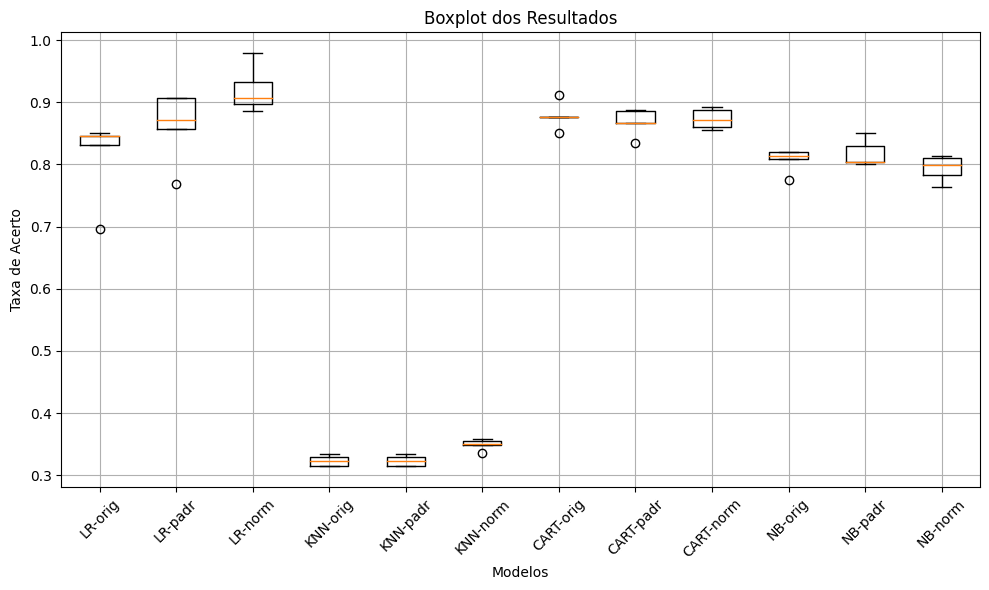

In [ ]:
# Criar figura e eixos para o boxplot
plt.figure(figsize=(10, 6))

# Plotar boxplot dos resultados
plt.boxplot(results, labels=names)

# Adicionar título e rótulos dos eixos
plt.title('Boxplot dos Resultados')
plt.xlabel('Modelos')
plt.ylabel('Taxa de Acerto')

# Exibir o boxplot
plt.xticks(rotation=45)  # Rotacionar os rótulos dos modelos para melhor visualização
plt.grid(True)  # Adicionar grade ao gráfico
plt.tight_layout()  # Ajustar layout para evitar sobreposição de elementos
plt.show()

4.5 Como observado acima, a melhor aplicação de modelo foi identificada como o uso de Regressão Logística normalizado, contradizendo dados previamente obtidos. Tendo em vista essa realidade, será realizada a aplicação de ensamble Voting Classifier com objetivo de identificação do melhor modelo possível no momento.

3.1 Seleciona-se o algoritmo de LogisticRegression para dados normalizados como mais indicados em razão de sua eficiência (baixo tempo para execução) e acurácia aceitável, como evidenciado acima e copiado abaixo:
  
Taxa de acerto média: 0.923
Desvio Padrão: 0.006



2.3 Refina a quantidade de atributos disponíveis, realizando o processo de feature selection

3.2 Não há ajuste inicial dos hiperparâmetros pois, tendo em vista como se trata de um dataset formado a partir de strings de texto transformadas em matriz de valores, é feita análise exploratória para ajuste posterior.

### 3.3 Avaliação de over/underfitting e treinamento do modelo

In [ ]:
# Inicializa o vetorizador TF-IDF com limite de features
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Transforma os dados de treinamento usando o vetorizador TF-IDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Inicializa e ajustar o redutor de dimensionalidade TruncatedSVD
svd = TruncatedSVD(n_components=10000)
X_train_tfidf_svd = svd.fit_transform(X_train_tfidf)

# Caminho para os arquivos de texto pré-processados
directory = '/content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc'

# Lista os arquivos no diretório
files = os.listdir(directory)

# Inicializa listas para armazenar dados de validação e rótulos
X_validation = []
Y_validation = []
X_validation_texts = []  # Lista para armazenar os textos de validação

In [ ]:
# Função para extrair os rótulos === Substituir seu uso pela função criar_rótulos
def extract_label(file_name):
    if 'matr' in file_name.lower():
        return 'matricula'
    else:
        return 'outro'

In [ ]:
# Loop pelos arquivos no diretório
for file_name in files:
    # Ler o conteúdo do arquivo
    with open(os.path.join(directory, file_name), 'r') as file:
        content = file.read()
    # Adicionar o texto à lista de textos de validação
    X_validation_texts.append(content)
    # Extrair o rótulo do nome do arquivo
    label = extract_label(file_name)
    # Adicionar o rótulo à lista de rótulos de validação
    Y_validation.append(label)

In [ ]:
# Vetorizar os textos de validação
X_validation_tfidf = tfidf_vectorizer.transform(X_validation_texts)

# Reduzir a dimensionalidade dos dados de validação usando TruncatedSVD
X_validation_tfidf_svd = svd.transform(X_validation_tfidf)

# Inicializar o MaxAbsScaler
max_abs_scaler = MaxAbsScaler()

# Ajustar o MaxAbsScaler nos dados de treinamento
X_train_max_abs_scaled = max_abs_scaler.fit_transform(X_train_tfidf_svd)

# Transformar os dados de validação usando o MaxAbsScaler ajustado
X_validation_max_abs_scaled = max_abs_scaler.transform(X_validation_tfidf_svd)

# Inicializar o modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo nos dados de treinamento
model.fit(X_train_max_abs_scaled, Y_train)

# Fazer previsões nos dados de validação
validation_predictions = model.predict(X_validation_max_abs_scaled)

# Calcular a acurácia nos dados de validação
validation_accuracy = accuracy_score(Y_validation, validation_predictions)

# Imprimir a acurácia nos dados de validação
print(f"Acurácia nos dados de validação: {validation_accuracy:.4f}")

# Calcular a acurácia nos dados de treinamento
train_predictions = model.predict(X_train_max_abs_scaled)
train_accuracy = accuracy_score(Y_train, train_predictions)

# Imprimir a acurácia nos dados de treinamento
print(f"Acurácia nos dados de treinamento: {train_accuracy:.4f}")

# Verificar se houve underfitting ou overfitting
if train_accuracy > validation_accuracy:
    print("Possível overfitting: A acurácia nos dados de treinamento é maior do que nos dados de validação.")
elif train_accuracy < validation_accuracy:
    print("Possível underfitting: A acurácia nos dados de treinamento é menor do que nos dados de validação.")
else:
    print("O modelo parece ter sido treinado adequadamente, não há indicação de underfitting ou overfitting.")


Acurácia nos dados de validação: 0.3029
Acurácia nos dados de treinamento: 0.9990
Possível overfitting: A acurácia nos dados de treinamento é maior do que nos dados de validação.


### Seleciona o melhor modelo, aplica seleção de features, treina e avalia o modelo


Seleciona Regressão Logística e mantém apenas uma amostra das features

In [ ]:
# Definir o modelo a ser utilizado
# model = LogisticRegression()

# Inicializar o seletor de features RFE (Eliminação Recursiva de Features)
# seletor_features = RFE(model, n_features_to_select=1000)  # Tendo em vista a quantidade enorme de features fixada anteriormente (10.000), se limita sua quantidade para 1/10 do valor original

# Aplicar o seletor de features aos dados de treinamento
### X_train_selecionado = seletor_features.fit_transform(X_train_matriz, Y_train) # Fica rodando pra sempre

### Aplicar a mesma seleção de features aos dados de teste
### X_test_selecionado = seletor_features.transform(X_test_matriz)

### Treinar o modelo com as features selecionadas
### model.fit(X_train_selecionado, Y_train)

# Avaliar o desempenho do modelo
# acuracia = model.score(X_test, Y_test)
# print(f'Acurácia do modelo com features selecionadas: {acuracia:.4f}')

4.4 Foi observado problema de overfitting claro, porém, devido ao tempo disponível para o MVP, o modelo será mantido. Futuramente, com os arquivos sigilosos com melhor qualidade mencionados anteriormente, o modelo será novamente treinado e aplicado e espera-se obter melhores resultados.



# Refino de atributos

### 3.4 Otimização dos hiperparâmetros

Tendo em vista a transformação dos textos obtidos a partir dos documentos em vetores e, em seguida, em uma matriz de valores, se opta pela adoção do método GridSearchCV para identificar os melhores hiperparâmetros;

In [ ]:
# Definindo os parâmetros para busca em grade
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# GridSearchCV para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5)
grid_search.fit(X_train_normalized, Y_train)

# Melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores hiperparâmetros encontrados:", best_params)

# Atualizando o modelo LogisticRegression com os melhores hiperparâmetros
logistic_model = LogisticRegression(**best_params)


Melhores hiperparâmetros encontrados: {'C': 0.001}


Tendo em vista a base de dados "suja", não se surpeende que os hiperparâmetros que apresentam o melhor resultado são os mais específivos (c: 0.001). Isso representa a tentativa do modelo de reduzir o overfitting, porém, como observamos a seguir, isso não é examente bem sucedido.

### Exportação do modelo para uso posterior

In [ ]:
# Caminho para salvar o modelo
model_path = '/content/drive/MyDrive/logistic_model.pkl'

# Salvar o modelo
joblib.dump(logistic_model, model_path)

['/content/drive/MyDrive/logistic_model.pkl']

3.5 Existem métodos mais complexos a serem utilizados e avaliados. Abaixo será realizado teste do ensemble Voting Classifier para busca de melhores resultados.

Comenta-se aqui que, o método de transformação dos vetores de palavras em matriz de valores se deu devido à mà qualidade dos dados de treinamento obtidos com o pré-processamento das imagens e leitura de seus textos. Com a leitura de qualquer arquivo texto utilizado para o aprendizado de máquina aqui realizado se observa como a retirada do texto dos arquivos apresentou péssimos resultados. Abaixo se lê um arquivo aleatório do diretório:


### Acesso aos arquivos de validação pré-processados

In [ ]:
# Caminho para os arquivos de texto pré-processados
directory = '/content/drive/MyDrive/MVP3_PUCRJtxtvalidacao_preproc'

# Listar os arquivos no diretório
files = os.listdir(directory)

# Selecionar um arquivo aleatório
random_file = random.choice(files)

# Caminho completo do arquivo aleatório
random_file_path = os.path.join(directory, random_file)

# Ler o conteúdo do arquivo aleatório e imprimir
with open(random_file_path, 'r') as file:
    content = file.read()
    print(content)

roder udiciario esta de minas gerais pnecatdo 033111 000968 285 daliro pars 62 roaltzasã laily fno beli com inícià 133098 horas zodi 8tic 00 far9u licita ico ªollzacão 0 coaundo lail5o pubikuesse eib tlaer ser gra mente mihas grais acordo com aidjo 22 da la do_execuçso iscal 683000 e intmem passoalmento cprosententa da b7andr cedor hipotecario 50 lor 0 cusc asslm oo9 execu ince nranar real tl5o atuullzação dou valores dosbembans panhorado as9m cpmo 09 volores execusho comun qu jufzo opracanto 052011 barros horeira julz da cxirdib 8 receqimento foidae recedf edssasda 249i43 4241_ 125 ofridd aopb uita 


Imprimido acima vemos um exemplo de arquivo texto pré-processado utilizado em nossa base de dados. É clara a má formação dos dados disponíveis (palavras e texto). Esse ponto influencia muito a falha do desenvolveimento de certas etapas do notebook.

### Treinando o modelo com os melhore parâmetros

In [ ]:
# Treinando o modelo com os melhores parâmetros
logistic_model.fit(X_train_matriz, Y_train)

# Fazendo previsões nos dados de teste
predictions = logistic_model.predict(X_test_matriz)

#### Imprimindo resultados para visualização

In [ ]:
def imprimir_correspondentes(Y_train, predictions):
    for y, pred in zip(Y_train, predictions):
        print(f"{y}\t{pred}")


In [ ]:
imprimir_correspondentes(Y_train, predictions)


matrícula	matrícula
matrícula	matrícula
matrícula	matrícula
matrícula	outro
matrícula	matrícula
matrícula	matrícula
matrícula	matrícula
outro	matrícula
matrícula	matrícula
outro	outro
matrícula	matrícula
outro	outro
outro	matrícula
matrícula	outro
matrícula	outro
matrícula	matrícula
matrícula	matrícula
outro	outro
matrícula	outro
outro	outro
matrícula	outro
matrícula	matrícula
matrícula	outro
matrícula	outro
outro	outro
outro	matrícula
outro	matrícula
matrícula	matrícula
matrícula	matrícula
outro	matrícula
matrícula	outro
outro	matrícula
matrícula	outro
matrícula	matrícula
outro	matrícula
outro	matrícula
matrícula	outro
matrícula	matrícula
outro	matrícula
matrícula	matrícula
outro	matrícula
outro	matrícula
outro	matrícula
matrícula	matrícula
matrícula	matrícula
outro	matrícula
matrícula	outro
matrícula	matrícula
matrícula	outro
matrícula	matrícula
matrícula	matrícula
outro	matrícula
matrícula	outro
matrícula	outro
matrícula	matrícula
matrícula	outro
matrícula	matrícula
outro	outro
matr

In [ ]:
def calcular_acuracia(Y_train, predictions):
    # Inicialize o contador de previsões corretas
    corretas = 0

    # Itere sobre cada par de rótulos reais e previsões
    for y, pred in zip(Y_train, predictions):
        # Se a previsão for igual ao rótulo real, incrementa o contador de previsões corretas
        if y == pred:
            corretas += 1

    # Calcule a acurácia dividindo o número de previsões corretas pelo total de previsões
    acuracia = corretas / len(Y_train)
    return acuracia

# Calcule a acurácia e imprima o resultado
acuracia = calcular_acuracia(Y_train, predictions)
print("Acurácia:", acuracia)

Acurácia: 0.12962962962962962


A taxa de acerto do modelo se apresenta inaceitável.

### 3.6 ENSEMBLE RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Lista para armazenar acurácias dos modelos
accuracies = []

# Definindo os pipelines
pipelines = [
    ('LR-orig', Pipeline([('LR', reg_log)])),
    ('LR-padr', Pipeline([('StandardScaler', StandardScaler()), ('LR', reg_log)])),
    ('LR-norm', Pipeline([('MaxAbsScaler', MaxAbsScaler()), ('LR', reg_log)])),
    ('KNN-orig', Pipeline([('KNN', knn)])),
    ('KNN-padr', Pipeline([('StandardScaler', StandardScaler()), ('KNN', knn)])),
    ('KNN-norm', Pipeline([('MaxAbsScaler', MaxAbsScaler()), ('KNN', knn)])),
    ('CART-orig', Pipeline([('CART', cart)])),
    ('CART-padr', Pipeline([('StandardScaler', StandardScaler()), ('CART', cart)])),
    ('CART-norm', Pipeline([('MaxAbsScaler', MaxAbsScaler()), ('CART', cart)])),
    ('NB-orig', Pipeline([('NB', naive_bayes)])),
    ('NB-padr', Pipeline([('StandardScaler', StandardScaler()), ('NB', naive_bayes)])),
    ('NB-norm', Pipeline([('MaxAbsScaler', MaxAbsScaler()), ('NB', naive_bayes)]))
]

# Inicializar uma lista para armazenar modelos de Random Forest
random_forest_models = []

# Adicionando o Random Forest Classifier aos pipelines
for name, model in pipelines:
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train_normalized, Y_train)  # Ajustar o Random Forest Classifier
    random_forest_models.append((f'RandomForest-{name}', rf_model))

best_accuracy = 0
best_model = None

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train_matriz, Y_train, cv=cv, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: Taxa de acerto média: %.3f (Desvio Padrão: %.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)  # Imprime os resultados de cada modelo testado com 3 casas decimais

    # Armazena a acurácia média e desvio padrão
    accuracies.append(cv_results.mean())

    # Atualiza o melhor modelo se a acurácia atual for maior
    if cv_results.mean() > best_accuracy:
        best_accuracy = cv_results.mean()
        best_model = model

# Calcula a acurácia média e desvio padrão do ensemble
average_accuracy = np.mean(accuracies)
std_deviation = np.std(accuracies)
print(f"Acurácia média do ensemble: {average_accuracy:.4f} (Desvio Padrão: {std_deviation:.4f})")

# Imprime o melhor modelo
print(f"Melhor modelo: {best_model}")

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(Y_test, predictions)

# Dividindo a matriz apenas entre "Verdadeiro" e "Falso"
conf_matrix_true_false = conf_matrix[:2, :2]

# Imprimindo a matriz de confusão
print("Matriz de Confusão (Verdadeiro x Falso):")
print(conf_matrix_true_false)


LR-orig: Taxa de acerto média: 0.926 (Desvio Padrão: 0.024)
LR-padr: Taxa de acerto média: 0.849 (Desvio Padrão: 0.049)
LR-norm: Taxa de acerto média: 0.921 (Desvio Padrão: 0.033)
KNN-orig: Taxa de acerto média: 0.633 (Desvio Padrão: 0.013)
KNN-padr: Taxa de acerto média: 0.323 (Desvio Padrão: 0.008)
KNN-norm: Taxa de acerto média: 0.350 (Desvio Padrão: 0.008)
CART-orig: Taxa de acerto média: 0.877 (Desvio Padrão: 0.020)
CART-padr: Taxa de acerto média: 0.879 (Desvio Padrão: 0.027)
CART-norm: Taxa de acerto média: 0.882 (Desvio Padrão: 0.028)
NB-orig: Taxa de acerto média: 0.817 (Desvio Padrão: 0.023)
NB-padr: Taxa de acerto média: 0.818 (Desvio Padrão: 0.020)
NB-norm: Taxa de acerto média: 0.794 (Desvio Padrão: 0.018)
Acurácia média do ensemble: 0.7556 (Desvio Padrão: 0.2014)
Melhor modelo: Pipeline(steps=[('LR', LogisticRegression(max_iter=200))])
Matriz de Confusão (Verdadeiro x Falso):
[[146  23]
 [ 12  62]]


# 4.0 Avaliação de resultados

### Preparo e disponibilização de conjunto de dados para validação do modelo - pule este bloco

Reuso dos blocos de código utilizados previamente para montagem do dataset de treino inicial, como da primeira vez, **é recomendado que se pule essa etapa do código para quando se realiza a avaliação.**

In [ ]:
# Caminhos das pastas de origem e destino
pasta_origem = "/content/drive/MyDrive/MVP3_PUCRJpngvalidacao"
pasta_destino = "/content/drive/MyDrive/MVP3_PUCRJpngvalidacao_preproc"

# Certifique-se de que a pasta de destino existe
if not os.path.exists(pasta_destino):
    os.makedirs(pasta_destino)

# Função para pré-processar uma imagem
def preprocess_image(image_path, output_path, target_size=(700, 990)):
    """Função para pré-processar uma imagem.

    Parâmetros:
    - image_path: Caminho para a imagem original.
    - output_path: Caminho para salvar a imagem pré-processada.
    - target_size: Tamanho para redimensionar a imagem. (700, 990).

    Retorna:
    - image: Imagem pré-processada.
    """
    try:
        # Verifica se o arquivo de saída já existe
        if os.path.exists(output_path):
            print(f"O documento {output_path} já existe. Ignorando o pré-processamento.")
            return None

        # Carregar a imagem em escala de cinza
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Verificar se a imagem foi carregada corretamente
        if image is None:
            raise FileNotFoundError(f"A imagem não pôde ser carregada a partir de {image_path}")

        # Redimensionar a imagem para o tamanho padrão
        image = cv2.resize(image, target_size)

        # Aplicar operações morfológicas para melhorar palavras
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
        image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

        # Salvar a imagem pré-processada
        cv2.imwrite(output_path, image)

        print(f"A imagem pré-processada foi salva em {output_path}")

        # Retornar a imagem pré-processada
        return image

    except Exception as e:
        print(f"Erro durante o pré-processamento da imagem: {e}")
        return None

# Percorre todas as imagens na pasta de origem
for arquivo in os.listdir(pasta_origem):
    # Verifica se o arquivo é uma imagem (adicionando mais extensões conforme necessário)
    if arquivo.endswith(".png") or arquivo.endswith(".jpg") or arquivo.endswith(".jpeg"):
        # Caminho completo para a imagem de origem
        caminho_imagem = os.path.join(pasta_origem, arquivo)

        # Caminho completo para salvar a imagem pré-processada
        caminho_destino = os.path.join(pasta_destino, arquivo)

        # Pré-processar a imagem e salvar na pasta de destino
        preprocess_image(caminho_imagem, caminho_destino)

In [ ]:
# Caminho das pastas de origem e destino
pasta_origem = "/content/drive/MyDrive/MVP3_PUCRJpngvalidacao_preproc"
pasta_destino = "/content/drive/MyDrive/MVP3_PUCRJ_textvalidacao_extracted"

# Certifique-se de que a pasta de destino existe
os.makedirs(pasta_destino, exist_ok=True)

# Inicialização do leitor de OCR em português
reader = easyocr.Reader(['pt'])

# Itere sobre todos os arquivos na pasta de origem
for arquivo in os.listdir(pasta_origem):
    # Verifique se o arquivo é uma imagem (adicionando mais extensões conforme necessário)
    if arquivo.endswith(".png") or arquivo.endswith(".jpg") or arquivo.endswith(".jpeg"):
        # Caminho completo para o arquivo de imagem pré-processada
        caminho_imagem = os.path.join(pasta_origem, arquivo)

        # Caminho completo para o arquivo de texto de destino
        caminho_destino_texto = os.path.join(pasta_destino, f"{os.path.splitext(arquivo)[0]}.txt")

        # Verifica se o arquivo de texto já existe
        if not os.path.exists(caminho_destino_texto):
            # Carregar a imagem
            image = cv2.imread(caminho_imagem)

            # Converta a imagem para escala de cinza
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Aplique a binarização usando limiar adaptativo
            image_binarized = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

            # Repita o processo a binarização para refinar a imagem e melhorar a leitura do texto (foram feitos testes prévios e assim a leitura foi mais precisa)
            image = image_binarized
            image_binarized = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

            # Use o OCR para ler o texto na imagem processada
            result = reader.readtext(image_binarized)

            # Salve o texto extraído em um arquivo de texto
            with open(caminho_destino_texto, "w", encoding="utf-8") as f:
                for item in result:
                    # O item[1] contém o texto extraído
                    f.write(item[1] + "\n")

            print(f"Texto extraído de {caminho_imagem} e salvo em {caminho_destino_texto}")
        else:
            print(f"O arquivo de texto {caminho_destino_texto} já existe. Pulando a extração de texto.")

In [ ]:
# Defina o caminho das pastas de origem e destino
pasta_origem = "/content/drive/MyDrive/MVP3_PUCRJ_textvalidacao_extracted"
pasta_destino = "/content/drive/MyDrive/MVP3_PUCRJtxtvalidacao_preproc"

# Certifique-se de que a pasta de destino existe, caso contrário, crie-a
os.makedirs(pasta_destino, exist_ok=True)

# Função para pré-processar texto
def preprocess_text(text):
    # Converter o texto para minúsculas
    text = text.lower()

    # Remover pontuações e caracteres especiais
    text = re.sub(r'[^\w\s]', '', text)

    # Remover múltiplos espaços em branco
    text = re.sub(r'\s+', ' ', text)

    return text

# Itere sobre todos os arquivos na pasta de origem
for arquivo in os.listdir(pasta_origem):
    # Verifique se o arquivo é um arquivo de texto
    if arquivo.endswith(".txt"):
        # Caminho completo para o arquivo de texto de origem
        caminho_arquivo_origem = os.path.join(pasta_origem, arquivo)

        # Caminho completo para o arquivo de texto pré-processado na pasta de destino
        caminho_arquivo_destino = os.path.join(pasta_destino, arquivo)

        # Verifica se o arquivo de texto pré-processado já existe
        if not os.path.exists(caminho_arquivo_destino):
            # Leia o conteúdo do arquivo de texto
            with open(caminho_arquivo_origem, 'r', encoding='utf-8') as file:
                conteudo = file.read()

            # Pré-processa o texto
            texto_preprocessado = preprocess_text(conteudo)

            # Salva o texto pré-processado no arquivo de texto na pasta de destino
            with open(caminho_arquivo_destino, 'w', encoding='utf-8') as file:
                file.write(texto_preprocessado)

            print(f"Arquivo {arquivo} pré-processado e salvo em {caminho_arquivo_destino}.")
        else:
            print(f"O arquivo de texto pré-processado {caminho_arquivo_destino} já existe. Pulando o pré-processamento.")

### Carga de Dataset de texto pré-processado de validação - continue aqui

download dataset validação = https://drive.google.com/drive/folders/1OzhYdZO03eVjrP6lLNyrYV83sQ-1p1Js?usp=sharing

In [ ]:
# Apenas definição do dataset, visando agilidade da execução do código
pasta_destino = "/content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc"

In [ ]:
# Registro do texto pré-processado para uso no código
# Itere sobre todos os arquivos na pasta de destino
for arquivo in os.listdir(pasta_destino):
    # Verifique se o arquivo é um arquivo de texto
    if arquivo.endswith(".txt"):
        # Caminho completo para o arquivo de texto de origem
        caminho_arquivo_destino = os.path.join(pasta_destino, arquivo)

        # Leia o conteúdo do arquivo de texto
        with open(caminho_arquivo_destino, 'r', encoding='utf-8') as file:
            conteudo = file.read()

        # Pré-processa o texto
        texto_preprocessado = preprocess_text(conteudo)

In [ ]:
# Carregar o vetorizador
caminho_vetorizador = '/content/drive/MyDrive/trained_vectors/vectorizer.pkl'
with open(caminho_vetorizador, 'rb') as f:
    vetorizador = pickle.load(f)

# Diretório dos textos pré-processados
diretorio_textos = '/content/drive/MyDrive/MVP3_PUCRJ_text_extracted_preproc'

# Função para ler os textos de um diretório
def ler_textos_diretorio(diretorio):
    textos = []
    titulos = []
    for arquivo in os.listdir(diretorio):
        caminho_arquivo = os.path.join(diretorio, arquivo)
        with open(caminho_arquivo, 'r', encoding='utf-8') as f:
            texto = f.read()
            textos.append(texto)
            titulos.append(arquivo)
    return textos, titulos

# Função para criar rótulos com base nos títulos dos arquivos
def criar_rotulos(titulos):
    rotulos = []
    palavras_chave = ['matr', 'cart[óo]rio', 'of[ií]cio', 'tabelionato', 'registro', 'comarca', 'im[oó]vel', 'im[oó]veis', 'imov', 'área', 'áreà', 'grau']
    for titulo in titulos:
        if any(re.search(fr'\b{palavra}\b', titulo, flags=re.IGNORECASE | re.UNICODE) for palavra in palavras_chave):
            rotulos.append('matrícula')
        else:
            rotulos.append('outro')
    return rotulos

# Ler textos do diretório e criar rótulos
textos, titulos = ler_textos_diretorio(diretorio_textos)
rotulos = criar_rotulos(titulos)

# Dividir dados em treino e teste (Checklist ponto 2.1)
X_train, X_test, Y_train, Y_test = train_test_split(textos, rotulos, test_size=0.2, random_state=42)

# Vetorizar os textos de treino e teste (Checklist ponto 2.2)
X_train_vetorizado = vetorizador.transform(X_train)
X_test_vetorizado = vetorizador.transform(X_test)

# Converter vetores TF-IDF em matrizes densas (Checklist ponto 2.2)
X_train_matriz = X_train_vetorizado.toarray()
X_test_matriz = X_test_vetorizado.toarray()

In [ ]:
# Normalizar os dados de entrada
scaler = StandardScaler(with_mean=False)
X_train_normalized = scaler.fit_transform(X_train_matriz)
X_test_normalized = scaler.transform(X_test_matriz)

# Lista para armazenar os modelos
models = []

# Adicionando os modelos à lista
# Se optou pela utilização dos modelos abaixo em razão à viabilidade de seu uso. Outros modelos apresentaram muita demora para sua execução
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

# Lista para armazenar resultados e nomes dos modelos
results = {'Original': [], 'Padronizado': []}
names = []

### Validação do modelo

### Imprimindo uma matriz de confusão

Matriz de confusão normalizada


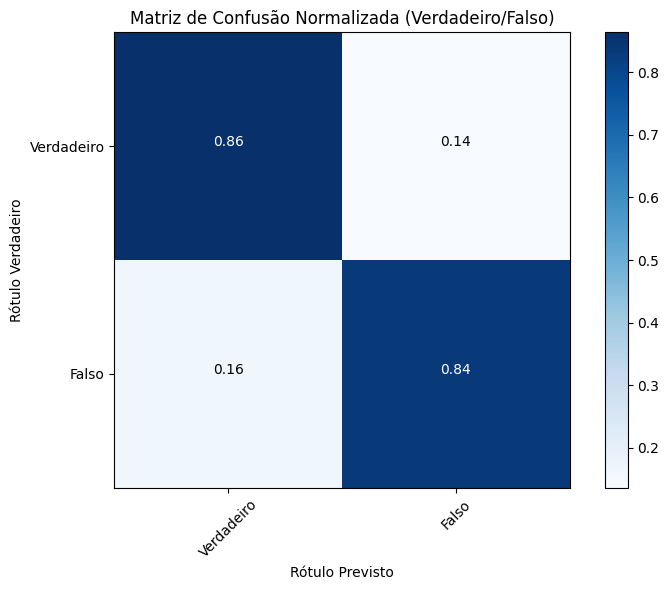

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):

    # Esta função plota uma matriz de confusão.

    # cm: matriz de confusão
    # classes: lista de classes
    # normalize: normalizar os valores na matriz
    # title: título do gráfico
    # cmap: mapa de cores

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão sem normalização')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Rótulo Verdadeiro')
    plt.xlabel('Rótulo Previsto')
    plt.tight_layout()

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(Y_test, predictions)

# Dividir a matriz em duas partes
conf_matrix_true_false = np.vstack((conf_matrix[0], conf_matrix[1:].sum(axis=0)))
conf_matrix_true_false = np.hstack((conf_matrix_true_false[:, 0].reshape(-1, 1), conf_matrix_true_false[:, 1:].sum(axis=1).reshape(-1, 1)))

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_matrix_true_false, classes=['Verdadeiro', 'Falso'], normalize=True,
                      title='Matriz de Confusão Normalizada (Verdadeiro/Falso)')
plt.show()

Observa-se um alto número de falsos falsos e baixos números de falsos verdadeiros e verdadeiros falsos, evidenciando baixa taxa de acerto do modelo aplicado.

Se ressalta, a explicação para cada estatística observada (Verdadeiro - V, Falso - F):

VV - 86% - Em razão do overfitting observado previamente, a taxa de acerto do modelo está elevada.

VF e FV - As taxas de previsão do modelo retorou baixa taxa de erro de verdadeiros falsos (14%) e falsos verdadeiros (16%), fortalecendo a realidade do overfitting supracitado.

FF - 84% - A alta taxa de aparição de falsos falsos reforça ainda mais a realidade do overfitting. Sendo levemente superior à taxa de verdadeiros verdadeiros, pode-se inferir que o modelo acerta pouco mais que erra, porém se mostrando completamente duvidoso.

Evidenciado pelo teste acima, a percebe-se a classificação errônea do modelo em grande parte dos arquivos "br_rjanrio_s7_0_txt_cx345_pt001_d0001de0001", onde todos deveriam estar classificados como "outro", reforçando a baixa eficiência do modelo.

### 4.1 Métricas de avaliação
Como evidenciado previamente, as métricas de avaliação do modelo são a tava de acerto (acurácia) e devio padrão. Com o objetivo de se acertar o máximo possível de previsões das strings de texto fornecidas e posteriormente transformadas em matriz de valores, o ideal seria uma taxa de acerto de 100% com DP de 0, porém isso é irreal. Neste caso, se opta, então pela adoção do supracitado.

### Comparação de resultados de diferentes modelos
Devido ao viés da base de dados, os modelos são inconclusivos. Tendo em vista apenas os dados apresentados, para os modelos treinados a melhor opção foi a utilização do modelo de Regressão Logística, com maior taxa de acerto dentro da base de dados utilizada, todavia, em razão do overfitting observado, repete-se a ineficácia da aplicação deste MVP.

# Conclusão e próximos passos

4.3 Os resultados fazem sentido

Dentro de um ponto de vista matemático, sim. A probablidade do modelo identicar uma matrícula de imóvel em uma página de PDF que teve sua imagem e texto processados para análise, a taxa de acerto do modelo, mesmo considerando overfitting, apresentou possibilidade de refino, uma vez que haja melhora da dataset de entrada e mais tempo para treinamento de modelos com, também, o uso de mais modelos e ensambles.

O modelo word2vec deve ser revisado caso tal realidade venha a se concretizar. Foi testado o modelo doc2vec, tendo em vista que cada página dos arquivos acabou se tornando um arquivo(documento) único, porém seu resultado não foi muito longe do esperado e impossibilitou sua manutenção no notebook devido a erros constantes e o processo de aprendizado que ocorreu durante a contrução desse produto.

4.6 A melhor solução encontrada foi, como evidenciado acima, aplicação de Regressão Logística com dados padronizados e regressão logística, após transformação dos arquivos texto em matrizes de valores, com uma acurácia de mais de 90%

#### Próximos passos
Como próximos passos, se ressalta a criação de um dataset com arquivos com menos ruído e a implementação dos modelos utilizados aqui para seu treino inicial.

Como buscado aqui, infelizmente sem sucesso, irá se buscar a solução ótima visando a leitura de arquivos PDF contendo processos (extra)judiciais, a identifiação de vetores contendo palavras que são os melhores hiperparâmetros para a identificação de documentos de matrículas de imóveis e seu refino. Para tal, é recomendado uso de word lemmatization como base para identificação de hiperparâmetros.

Previamente, haviam arquivos contendo texto selecionável disponíveis para a leitura e treinamento de modelo, porém eram menos de 20 documentos, sendo uma tamostra pequena demais para treinamento e teste de modelo de machine learning. Foi, inclusive, realizada tentativa de uso de tais exemplos para a obtenção de parte do dataset através da aplicação da biblioteca.

Como recomendados acima, a utilização de word lemmatization seria ideal para treinamento deste tipo de modelo de classificação. Houve tentativa de uso da técnica neste notebook em versão prévia, porém não foi obtido resultado proveitoso tendo em vista a qualidade do dataset utilizado.

#### Considerações finais:

O código é ineficaz para o conjunto de dados apresentado, mas se apresenta como um ponto inicial para desenvolvimento do modelo de machine learning visando identificar matrículas de imóveis presentes dentro de processos judiciais.

Questões temporais e operacionais foram de grande influência para a não otimização deste notebook, tendo em vista que me foi trazida a atenção para um ponto importante que trouxe a necessidade de reescrever praticamente todo o código desde a quarta-feira (24/04/2024) na semana da entrega.

O vetorizador salvo no modelo word2vec utilizado como base para identificação de palavras em strings foi altamente influenciado negativamente devido à baixa qualidade e processamento do dataset de arquivos PDF. Esse ponto influenciou todo o resultado obervado no notebook, isso deve ser refinado.

Em outras notas, esse trabalho serve como base para o desenvolvimento de produto sob demanda da empresa onde trabalho. Me ajudou a aprender muito, mesmo com muitos erros.

Caso seja possível, peço que avaliadores do notebook verifiquem suas versões antigas para observação dos desenvolvimentos deste produto.